<a href="https://colab.research.google.com/github/VynLavenda/Phising-Detection/blob/main/Phising%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UAS Keamanan Data
Evelyn

36230029

Alaniah Nisrina, B.Eng., M.Eng.

Sumber Dataset: Kaggle
https://www.kaggle.com/datasets/naserabdullahalam/phishing-email-dataset?select=CEAS_08.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("CEAS_08.csv", engine='python', on_bad_lines='warn')
df

/tmp/ipython-input-4170906757.py:6: ParserWarning: Skipping line 3636: field larger than field limit (131072)

  df = pd.read_csv("CEAS_08.csv", engine='python', on_bad_lines='warn')


,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...,...
39148,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39149,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39150,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0
39151,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0


# Eksplorasi dan Preprocessing Data

In [ ]:
# Drop fitur yang tidak diperlukan
df = df.drop(columns=['sender', 'receiver', 'date'])
df.head()

,subject,body,label,urls
0,Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


In [ ]:
# Analisis Deskriptif Dataset
df.info()

# Jumlah baris dan kolom
print(f"Jumlah sample: {df.shape[0]}")
print(f"Jumlah fitur: {df.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39153 entries, 0 to 39152
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  39125 non-null  object
 1   body     39153 non-null  object
 2   label    39153 non-null  int64 
 3   urls     39153 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ MB
Jumlah sample: 39153
Jumlah fitur: 4


In [ ]:
df.describe()

,label,urls
count,39153.000000,39153.000000
mean,0.557863,0.669961
std,0.496647,0.470233
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
# Cek missing values
missing = df.isnull().sum()
missing[missing > 0]

,0
subject,28


In [ ]:
df["subject"] = df["subject"].fillna("")

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text_advanced(text):
    if pd.isna(text):
        return ""

    text = text.lower()

    # Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)

    # Hapus email
    text = re.sub(r'\S+@\S+', ' ', text)

    # Hapus angka dan token mirip r619753, 10feb2008, dll.
    text = re.sub(r'\b[a-zA-Z]*\d+[a-zA-Z]*\b', ' ', text)

    # Hapus path UNIX / folder teknis
    text = re.sub(r'\/[A-Za-z0-9_\-\/\.]+', ' ', text)

    # Hapus karakter non-alphabet
    text = re.sub(r'[^a-z\s]', ' ', text)

    # Pecah kata yang sangat panjang (email banyak yang menempel)
    text = re.sub(r'([a-z]{12,})',
                  lambda m: ' '.join(re.findall('.{1,6}', m.group(0))),
                  text)

    # Pisahkan LowerUpper jika masih ada
    text = re.sub(r'([a-z])([A-Z])', r'\1 \2', text)

    # Tokenizing
    tokens = text.split()

    # Hapus stopwords + kata teknis tidak relevan
    custom_remove = ["spamassassin", "opensuse", "svn", "trunk", "lib", "dev"]
    tokens = [t for t in tokens if t not in stop_words and t not in custom_remove]

    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

df["subject_clean"] = df["subject"].apply(clean_text_advanced)
df["body_clean"] = df["body"].apply(clean_text_advanced)

# Gabungkan teks subject + body
df["text"] = df["subject_clean"] + " " + df["body_clean"]

In [ ]:
df

,subject,body,label,urls,subject_clean,body_clean,text
0,Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1,never agree loser,buck troubles caused small dimension soon beco...,never agree loser buck troubles caused small d...
1,Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1,befriend jenna jameson,upgrade sex pleasures techniques,befriend jenna jameson upgrade sex pleasures t...
2,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,cnn com daily top,daily top cnn com top videos stories aug pm ed...,cnn com daily top daily top cnn com top videos...
3,Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1,commit,would anyone object removing list tld basicall...,commit would anyone object removing list tld b...
4,SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1,specia lprice spharm morein fo,welcom efasts hippin gcusto mersup port,specia lprice spharm morein fo welcom efasts h...
...,...,...,...,...,...,...,...
39148,CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0,cnn alerts custom alert,cnn alerts custom alert alert name custom aler...,cnn alerts custom alert cnn alerts custom aler...
39149,CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0,cnn alerts custom alert,cnn alerts custom alert alert name custom aler...,cnn alerts custom alert cnn alerts custom aler...
39150,Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0,slideshow viewer,hello great work slide show viewer application...,slideshow viewer hello great work slide show v...
39151,Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0,note digit years,mail sender coming intuit com servers subject ...,note digit years mail sender coming intuit com...


In [ ]:
duplicates = df[df.duplicated(subset=['text'], keep=False)]
duplicates

,subject,body,label,urls,subject_clean,body_clean,text
1,Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1,befriend jenna jameson,upgrade sex pleasures techniques,befriend jenna jameson upgrade sex pleasures t...
2,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,cnn com daily top,daily top cnn com top videos stories aug pm ed...,cnn com daily top daily top cnn com top videos...
7,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,cnn com daily top,daily top cnn com top videos stories aug pm ed...,cnn com daily top daily top cnn com top videos...
9,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,cnn com daily top,daily top cnn com top videos stories aug pm ed...,cnn com daily top daily top cnn com top videos...
12,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,cnn com daily top,daily top cnn com top videos stories aug pm ed...,cnn com daily top daily top cnn com top videos...
...,...,...,...,...,...,...,...
39139,CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0,cnn alerts custom alert,cnn alerts custom alert alert name custom aler...,cnn alerts custom alert cnn alerts custom aler...
39140,CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0,cnn alerts custom alert,cnn alerts custom alert alert name custom aler...,cnn alerts custom alert cnn alerts custom aler...
39145,CNN Alerts: My Custom Alert,\n\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\...,1,0,cnn alerts custom alert,cnn alerts custom alert alert name custom aler...,cnn alerts custom alert cnn alerts custom aler...
39148,CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0,cnn alerts custom alert,cnn alerts custom alert alert name custom aler...,cnn alerts custom alert cnn alerts custom aler...


In [ ]:
df_clean = df.drop_duplicates(subset=['text'], keep='first').reset_index(drop=True)
len_before = len(df)
len_after  = len(df_clean)

print("Sebelum:", len_before)
print("Sesudah:", len_after)
print("Duplikasi dihapus:", len_before - len_after)

Sebelum: 39153
Sesudah: 32495
Duplikasi dihapus: 6658


In [ ]:
df_clean

,subject,body,label,urls,subject_clean,body_clean,text
0,Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1,never agree loser,buck troubles caused small dimension soon beco...,never agree loser buck troubles caused small d...
1,Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1,befriend jenna jameson,upgrade sex pleasures techniques,befriend jenna jameson upgrade sex pleasures t...
2,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,cnn com daily top,daily top cnn com top videos stories aug pm ed...,cnn com daily top daily top cnn com top videos...
3,Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1,commit,would anyone object removing list tld basicall...,commit would anyone object removing list tld b...
4,SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1,specia lprice spharm morein fo,welcom efasts hippin gcusto mersup port,specia lprice spharm morein fo welcom efasts h...
...,...,...,...,...,...,...,...
32490,RE: [opensuse] Apache and SSL,\nI don't use virtual hosts. Here is the entry...,0,1,apache ssl,use virtual hosts entry file entering curl fri...,apache ssl use virtual hosts entry file enteri...
32491,Patients can access Our online health shop is ...,\n\nLab-tested female sensual leverage!\n\nPat...,1,0,patients access online health shop internet,lab tested female sensual leverage patients ac...,patients access online health shop internet la...
32492,Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0,slideshow viewer,hello great work slide show viewer application...,slideshow viewer hello great work slide show v...
32493,Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0,note digit years,mail sender coming intuit com servers subject ...,note digit years mail sender coming intuit com...


/tmp/ipython-input-1576167453.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean['label'], palette='Set2')


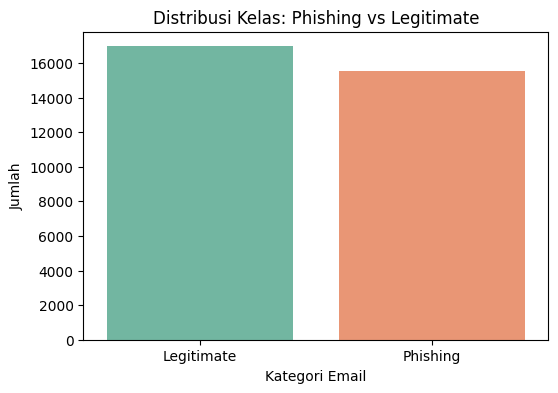

label
0    16957
1    15538
Name: count, dtype: int64


In [ ]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df_clean['label'], palette='Set2')
plt.xticks([0,1], ['Legitimate', 'Phishing'])
plt.title("Distribusi Kelas: Phishing vs Legitimate")
plt.xlabel("Kategori Email")
plt.ylabel("Jumlah")
plt.show()

print(df_clean['label'].value_counts())

In [ ]:
# Pilih fitur relevan untuk modeling
X = df_clean[['text', 'urls']]   # fitur
y = df_clean['label']            # target

# Bangun Model Deteksi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Step 1: split data
X_train_text, X_test_text, y_train, y_test, X_train_urls, X_test_urls = train_test_split(
    df_clean['text'], df_clean['urls'], df_clean['label'],
    test_size=0.2,
    random_state=42,
    stratify=df_clean['label']  # menjaga keseimbangan label
)

# Step 2: TF-IDF
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

# Step 3: Gabungkan TF-IDF (sparse) dengan fitur numerik urls
X_train_final = hstack([X_train_tfidf, X_train_urls.values.reshape(-1,1)])
X_test_final = hstack([X_test_tfidf, X_test_urls.values.reshape(-1,1)])

print("Train shape:", X_train_final.shape)
print("Test shape:", X_test_final.shape)

Train shape: (25996, 5001)
Test shape: (6499, 5001)


**Logistic Regression**

Accuracy: 0.8722880443145099

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.82      0.80      0.81      2216
    Phishing       0.90      0.91      0.90      4283

    accuracy                           0.87      6499
   macro avg       0.86      0.85      0.86      6499
weighted avg       0.87      0.87      0.87      6499



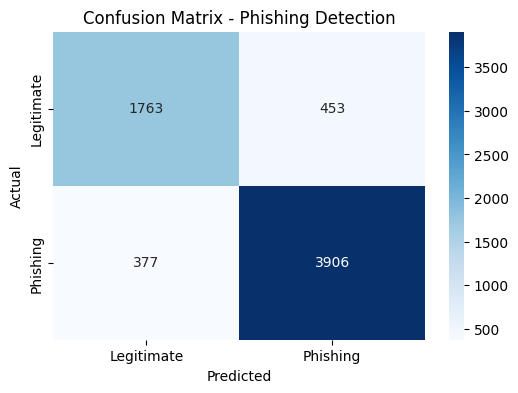

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model
lr_model = LogisticRegression(max_iter=300, n_jobs=-1)
lr_model.fit(X_train_final, y_train)

# Predict
lr_y_pred = lr_model.predict(X_test_final)

# Evaluasi
acc = accuracy_score(y_test, lr_y_pred)
print("Accuracy:", acc)
print("\nClassification Report:")
print(classification_report(y_test, lr_y_pred, target_names=["Legitimate", "Phishing"]))

# Confusion Matrix
cm = confusion_matrix(y_test, lr_y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Legitimate", "Phishing"],
            yticklabels=["Legitimate", "Phishing"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Phishing Detection")
plt.show()

Logistic Regression ROC-AUC: 0.9475528093183443
Logistic Regression PR-AUC: 0.9732219164588118


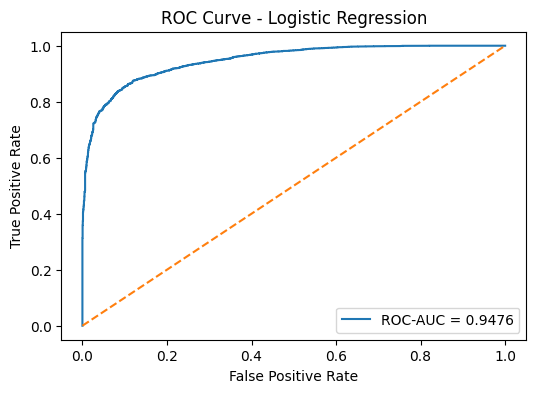

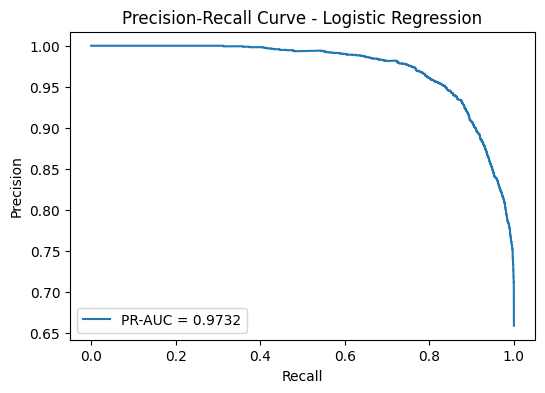

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
# Probabilitas kelas phishing (label = 1)
lr_probs = lr_model.predict_proba(X_test_final)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, lr_probs)
roc_auc_lr = auc(fpr, tpr)

# PR Curve
prec, rec, _ = precision_recall_curve(y_test, lr_probs)
pr_auc_lr = auc(rec, prec)

print("Logistic Regression ROC-AUC:", roc_auc_lr)
print("Logistic Regression PR-AUC:", pr_auc_lr)

# Plot ROC
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc_lr:.4f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# Plot PR
plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f"PR-AUC = {pr_auc_lr:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend()
plt.show()

Random Forest

Random Forest Accuracy: 0.9184489921526389

Random Forest Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.87      0.89      0.88      2216
    Phishing       0.94      0.93      0.94      4283

    accuracy                           0.92      6499
   macro avg       0.91      0.91      0.91      6499
weighted avg       0.92      0.92      0.92      6499



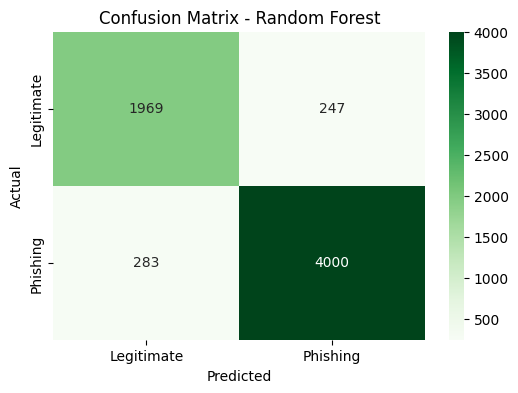

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train_final, y_train)

# Prediksi
rf_pred = rf.predict(X_test_final)

# Evaluasi
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred, target_names=["Legitimate", "Phishing"]))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Legitimate", "Phishing"],
            yticklabels=["Legitimate", "Phishing"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest ROC-AUC: 0.97543342582673
Random Forest PR-AUC: 0.9873449899205552


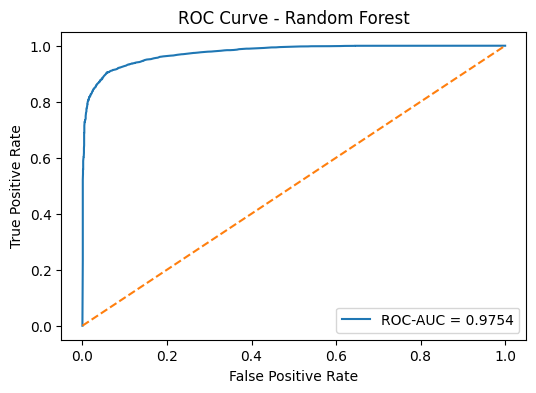

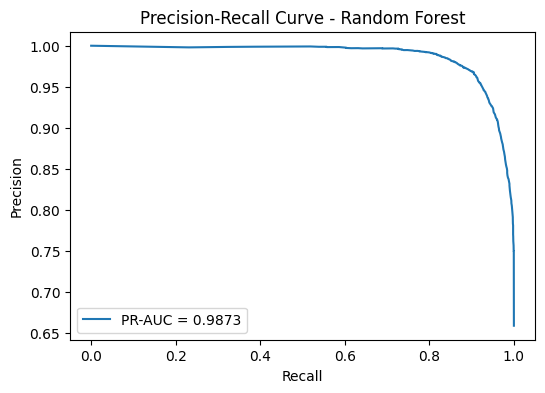

In [ ]:
rf_probs = rf.predict_proba(X_test_final)[:, 1]

# ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# PR
prec_rf, rec_rf, _ = precision_recall_curve(y_test, rf_probs)
pr_auc_rf = auc(rec_rf, prec_rf)

print("Random Forest ROC-AUC:", roc_auc_rf)
print("Random Forest PR-AUC:", pr_auc_rf)

# Plot ROC
plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f"ROC-AUC = {roc_auc_rf:.4f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# Plot PR
plt.figure(figsize=(6,4))
plt.plot(rec_rf, prec_rf, label=f"PR-AUC = {pr_auc_rf:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.legend()
plt.show()

**Isolation Forest — Deteksi Anomali (Phishing)**

Isolation Forest tidak menggunakan label, tetapi setelah model memberi prediksi anomali, kita cocokkan dengan label phishing (1).

Dalam anomaly detection:

Prediksi -1 = anomaly (dianggap phishing)

Prediksi 1 = normal (dianggap legitimate)


Isolation Forest Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.36      0.70      0.48      2216
    Phishing       0.70      0.36      0.48      4283

    accuracy                           0.48      6499
   macro avg       0.53      0.53      0.48      6499
weighted avg       0.59      0.48      0.48      6499



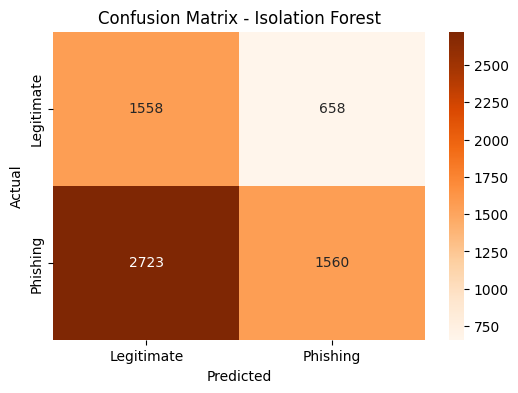

In [ ]:
from sklearn.ensemble import IsolationForest

# Model Isolation Forest
iso = IsolationForest(
    n_estimators=200,
    contamination=0.35,
    random_state=42
)

iso.fit(X_train_final)

# Prediksi (-1 anomaly, 1 normal)
iso_pred_raw = iso.predict(X_test_final)
# Konversi ke format label (1 = phishing, 0 = legitimate)
iso_pred = [1 if p == -1 else 0 for p in iso_pred_raw]

print("\nIsolation Forest Classification Report:")
print(classification_report(y_test, iso_pred, target_names=["Legitimate", "Phishing"]))

# Confusion Matrix
cm_iso = confusion_matrix(y_test, iso_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_iso, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Legitimate", "Phishing"],
            yticklabels=["Legitimate", "Phishing"])
plt.title("Confusion Matrix - Isolation Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Isolation Forest ROC-AUC: 0.5411137643491901
Isolation Forest PR-AUC: 0.7195551694081501


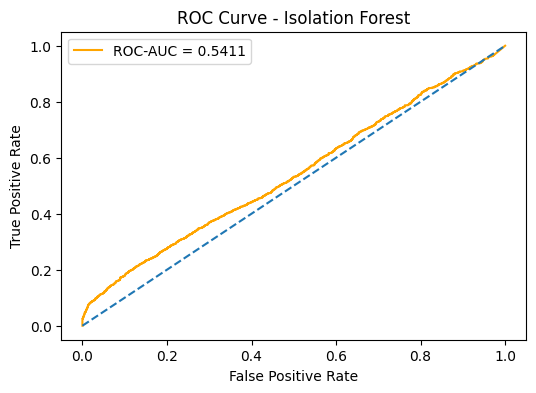

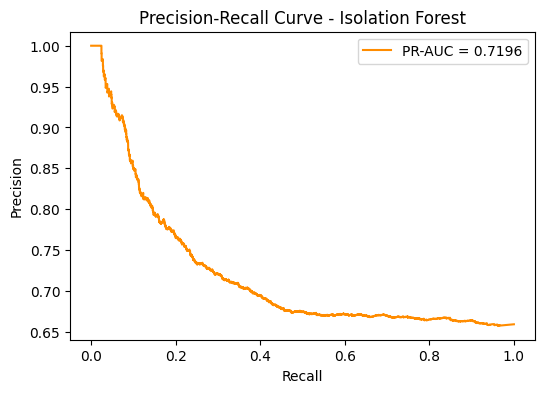

In [ ]:
# Anomaly score (semakin kecil = lebih anomali)
iso_scores = -iso.decision_function(X_test_final)

# ROC
fpr_iso, tpr_iso, _ = roc_curve(y_test, iso_scores)
roc_auc_iso = auc(fpr_iso, tpr_iso)

# PR
prec_iso, rec_iso, _ = precision_recall_curve(y_test, iso_scores)
pr_auc_iso = auc(rec_iso, prec_iso)

print("Isolation Forest ROC-AUC:", roc_auc_iso)
print("Isolation Forest PR-AUC:", pr_auc_iso)

# Plot ROC
plt.figure(figsize=(6,4))
plt.plot(fpr_iso, tpr_iso, label=f"ROC-AUC = {roc_auc_iso:.4f}", color="orange")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Isolation Forest")
plt.legend()
plt.show()

# Plot PR
plt.figure(figsize=(6,4))
plt.plot(rec_iso, prec_iso, label=f"PR-AUC = {pr_auc_iso:.4f}", color="darkorange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Isolation Forest")
plt.legend()
plt.show()

**Autoencoder CNN/RNN untuk teks (Bidirectional LSTM)**

Alasannya:

Autoencoder menangani “keanehan numerik” di ruang TF-IDF. LSTM menangani “keanehan bahasa” berbasis urutan kata. Kombinasi keduanya menghasilkan sistem hybrid yang biasanya outperform model tunggal

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# ==============================
# 1. Tokenizing
# ==============================
MAX_WORDS = 20000
MAX_LEN = 200

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df_clean['text'])

# Convert text → sequences → pad
X = tokenizer.texts_to_sequences(df_clean['text'])
X = pad_sequences(X, maxlen=MAX_LEN)

# Target
y = df_clean['label'].values

# ==============================
# 2. Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=df_clean['label']
)

# ==============================
# 3. Build BiLSTM model (Fixed!)
# ==============================
model = Sequential([
    Input(shape=(MAX_LEN,)),
    Embedding(input_dim=MAX_WORDS, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()   # NOW PARAMS WILL BE SHOWN CORRECTLY

# ==============================
# 4. Train
# ==============================
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

# ==============================
# 5. Evaluate
# ==============================
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print("\nTest Accuracy:", acc)
print("Test Loss:", loss)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,662,977 (10.16 MB)

 Trainable params: 2,662,977 (10.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 171s 456ms/step - accuracy: 0.9122 - loss: 0.2015 - val_accuracy: 0.9935 - val_loss: 0.0224
Epoch 2/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 165s 451ms/step - accuracy: 0.9964 - loss: 0.0136 - val_accuracy: 0.9973 - val_loss: 0.0104
Epoch 3/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 166s 454ms/step - accuracy: 0.9986 - loss: 0.0049 - val_accuracy: 0.9962 - val_loss: 0.0100
Epoch 4/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 200s 448ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.9965 - val_loss: 0.0134
Epoch 5/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 201s 445ms/step - accuracy: 0.9997 - loss: 8.4913e-04 - val_accuracy: 0.9942 - val_loss: 0.0196
204/204 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.9971 - loss: 0.0141

Test Accuracy: 0.9963071346282959
Test Loss: 0.016507858410477638


# Evaluasi Model Autoencoder

204/204 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step
Accuracy: 0.9963071241729496
Precision: 0.9955012853470437
Recall: 0.9967824967824968
F1-Score: 0.9961414790996784
ROC-AUC: 0.9997373147255189


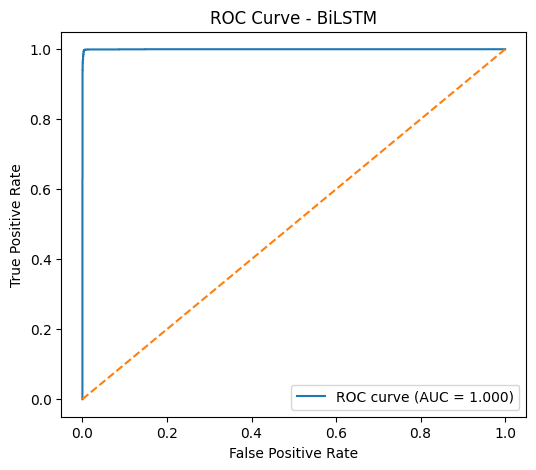

PR-AUC: 0.9996926092265821


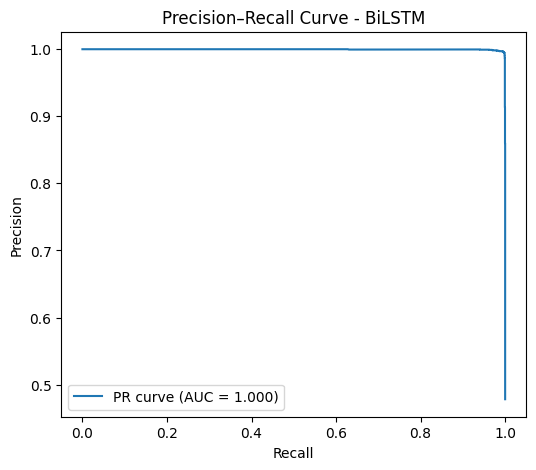

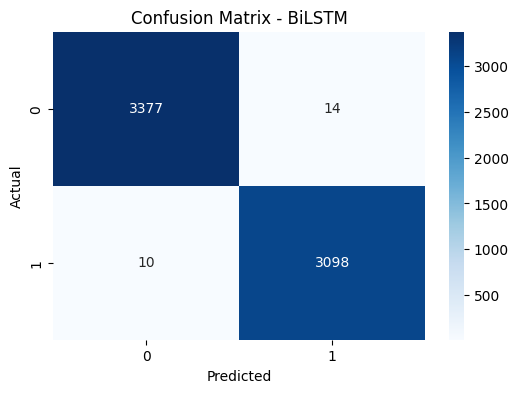

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)
# 1. PREDICTIONS
y_pred_proba = model.predict(X_test).ravel()
y_pred = (y_pred_proba >= 0.5).astype(int)

# 2. METRICS
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-Score:", f1)

# 3. ROC–AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC-AUC:", roc_auc)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - BiLSTM")
plt.legend()
plt.show()

# 4. PR–AUC (Precision–Recall AUC)
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall_vals, precision_vals)
print("PR-AUC:", pr_auc)

plt.figure(figsize=(6, 5))
plt.plot(recall_vals, precision_vals, label=f"PR curve (AUC = {pr_auc:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve - BiLSTM")
plt.legend()
plt.show()

# 5. CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - BiLSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from collections import Counter

# Contoh: X_train_text = list berisi teks email
#         y_train = label (1 = phishing, 0 = legitimate)

phishing_texts = [text for text, label in zip(X_train_text, y_train) if label == 1]

def clean_text(t):
    t = t.lower()
    t = re.sub(r'[^a-z0-9 ]+', ' ', t)  # hapus simbol
    return t

# gabungkan semua teks
all_words = " ".join(clean_text(t) for t in phishing_texts).split()

# hitung frekuensi token
word_counts = Counter(all_words)

# ambil 20 token paling sering
top_tokens = word_counts.most_common(20)

print("Top 20 Phishing Indicators:")
for token, count in top_tokens:
    print(f"{token}: {count}")

Top 20 Phishing Indicators:
replica: 6167
watches: 4493
life: 2159
health: 1942
e: 1896
watch: 1837
rolex: 1820
time: 1771
get: 1755
classics: 1725
p: 1664
com: 1635
best: 1468
work: 1441
site: 1430
c: 1423
take: 1389
new: 1382
ge: 1340
offer: 1324


# Simulasikan Mitigasi & Defender Action

≥ 0.95 atau domain sering mengirim attack (Block Domain) : Tolak semua email, blacklisted, notify admin.

≥ 0.8 (Quarantine Email) : Email ditahan, tidak dikirim ke inbox.

0.5 – 0.8 (Alert Scoring) : Email dikirim tapi diberi warning + pemeriksaan manual.

< 0.5 (Deliver) : Email aman, tidak ada aksi khusus.

In [ ]:
def defender_action(score, domain, domain_attack_count=0):
    """
    score : probabilitas phishing dari model
    domain : domain/url indicator dari email
    domain_attack_count : history seberapa sering domain mengirim phishing
    """

    # RULE 1: Score >= 0.95 atau domain sangat berbahaya
    if score >= 0.95 or domain_attack_count >= 5:
        return "BLOCK DOMAIN (Blacklist + Reject Email)"

    # RULE 2: Score >= 0.8
    elif score >= 0.8:
        return "QUARANTINE EMAIL (Hold, user tidak menerima)"

    # RULE 3: 0.5 – 0.8
    elif 0.5 <= score < 0.8:
        return "ALERT SCORING (Deliver + Warning + Manual Review)"

    # RULE 4: < 0.5
    else:
        return "DELIVER (Email aman)"
test_domains = X_test_urls.values
domain_attack_history = {
    "malicious.com": 7,
    "spammy.net": 3
}

actions = []
for score, domain in zip(y_pred_proba, test_domains):
    attack_count = domain_attack_history.get(domain, 0)
    action = defender_action(score, domain, attack_count)
    actions.append(action)

simulasi_df = pd.DataFrame({
    "Email_Text": X_test_text.values,
    "Domain": test_domains,
    "Phish_Probability": y_pred_proba,
    "Model_Prediction": y_pred,
    "Defender_Action": actions
})

simulasi_df.head()

,Email_Text,Domain,Phish_Probability,Model_Prediction,Defender_Action
0,doctors help men low libidos men foreplay worst,1,0.999992,1,BLOCK DOMAIN (Blacklist + Reject Email)
1,brand name meds dirt cheap price dear b bcf bc...,1,0.999991,1,BLOCK DOMAIN (Blacklist + Reject Email)
2,produce stronger rock hard erections size matt...,1,0.999990,1,BLOCK DOMAIN (Blacklist + Reject Email)
3,techre public develop slick web interfaces ext...,0,0.000012,0,DELIVER (Email aman)
4,uai cp ai second call partic ipatio n call par...,0,0.000015,0,DELIVER (Email aman)


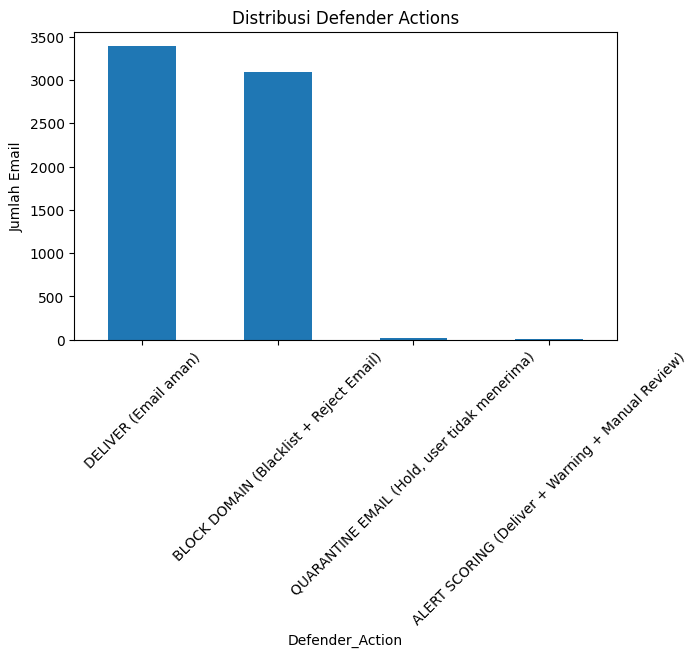

In [ ]:
plt.figure(figsize=(7,4))
simulasi_df['Defender_Action'].value_counts().plot(kind='bar')
plt.title("Distribusi Defender Actions")
plt.ylabel("Jumlah Email")
plt.xticks(rotation=45)
plt.show()